In [ ]:
# Forecasting is done wrt to time 
# regression is done wrt to another variable 

In [1]:
import pandas as pd

In [8]:
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1] #consider the last table only 
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4147,11/Nov/2021,BANGALORE,11640,900,1000,950
4148,12/Nov/2021,BANGALORE,13770,800,1000,900
4149,16/Nov/2021,BANGALORE,9060,1200,1600,1400
4150,17/Nov/2021,BANGALORE,7550,1400,1600,1500


In [3]:
type(df)

list

In [7]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [10]:
df = df.dropna() #drop values of NaN
df  # delets the entire row

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4146,08/Nov/2021,BANGALORE,11740,1000,1200,1100
4147,11/Nov/2021,BANGALORE,11640,900,1000,950
4148,12/Nov/2021,BANGALORE,13770,800,1000,900
4149,16/Nov/2021,BANGALORE,9060,1200,1600,1400


In [11]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#Date should be ds  - datatype should be datetime64[ns]
#Modal Price (Rs/q) should be y - datatype should be int64 

In [12]:
df.rename(columns = {'Date':'ds','Modal Price (Rs/q)':'y'},inplace = True)
#inplace=True makes sure that the columns are renamed and no duplicate df is created 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4151 non-null   object
 1   Market                4151 non-null   object
 2   Arrival(q)            4151 non-null   int64 
 3   Price Minimum (Rs/q)  4151 non-null   object
 4   Price Maximum (Rs/q)  4151 non-null   object
 5   y                     4151 non-null   object
dtypes: int64(1), object(5)
memory usage: 227.0+ KB


In [16]:
df1 = df[['ds','y']] #2 columns in the new dataframe 
df1

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4146,08/Nov/2021,1100
4147,11/Nov/2021,950
4148,12/Nov/2021,900
4149,16/Nov/2021,1400


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4151 non-null   object
 1   y       4151 non-null   object
dtypes: object(2)
memory usage: 97.3+ KB


In [ ]:
df1['ds'] = pd.to_datetime(df1['ds']) #from 17/Nov/2021 it is changing to 2021-11-17 which is the std format for pandas
#type casting 

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4151 non-null   datetime64[ns]
 1   y       4151 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 97.3+ KB


In [20]:
df1['y'] = df1['y'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4151 non-null   datetime64[ns]
 1   y       4151 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 97.3 KB


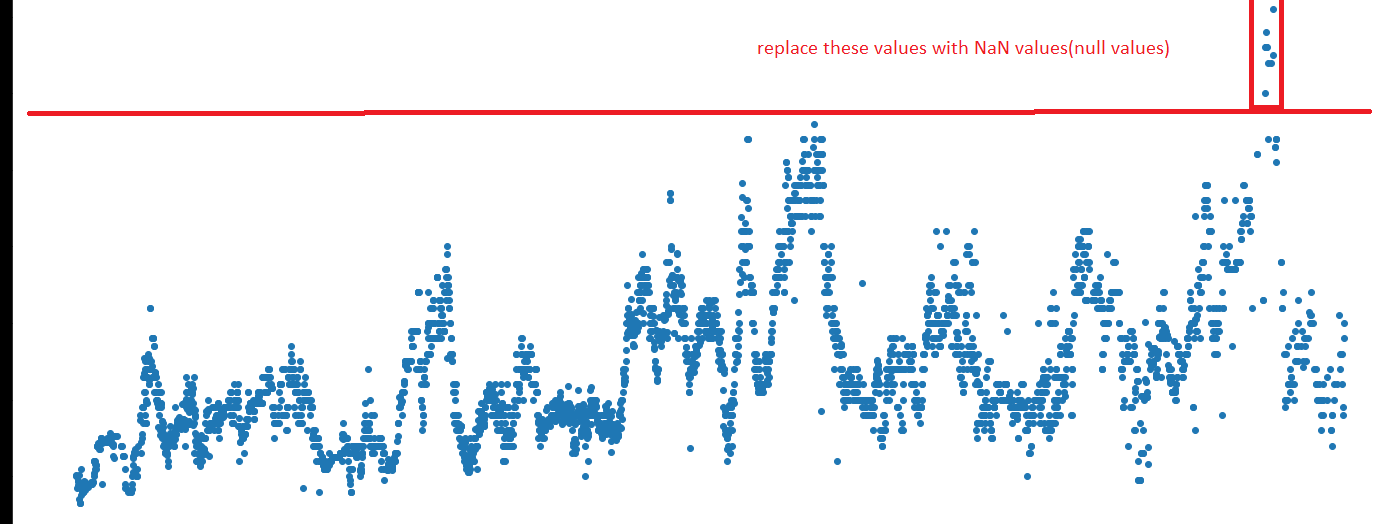

In [ ]:
# #FBProphet
# The input to Prophet is always a dataframe with two columns: ds and y.
#  The ds (datestamp) column should be of a format expected by Pandas,
#  ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
#  The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.scatter(df1['ds'],df1['y'])
plt.show()

In [ ]:
# threshold/outliers
import numpy as np 
df1['y'] = np.where(df1['y']>2800, np.nan, df1['y'])
df1

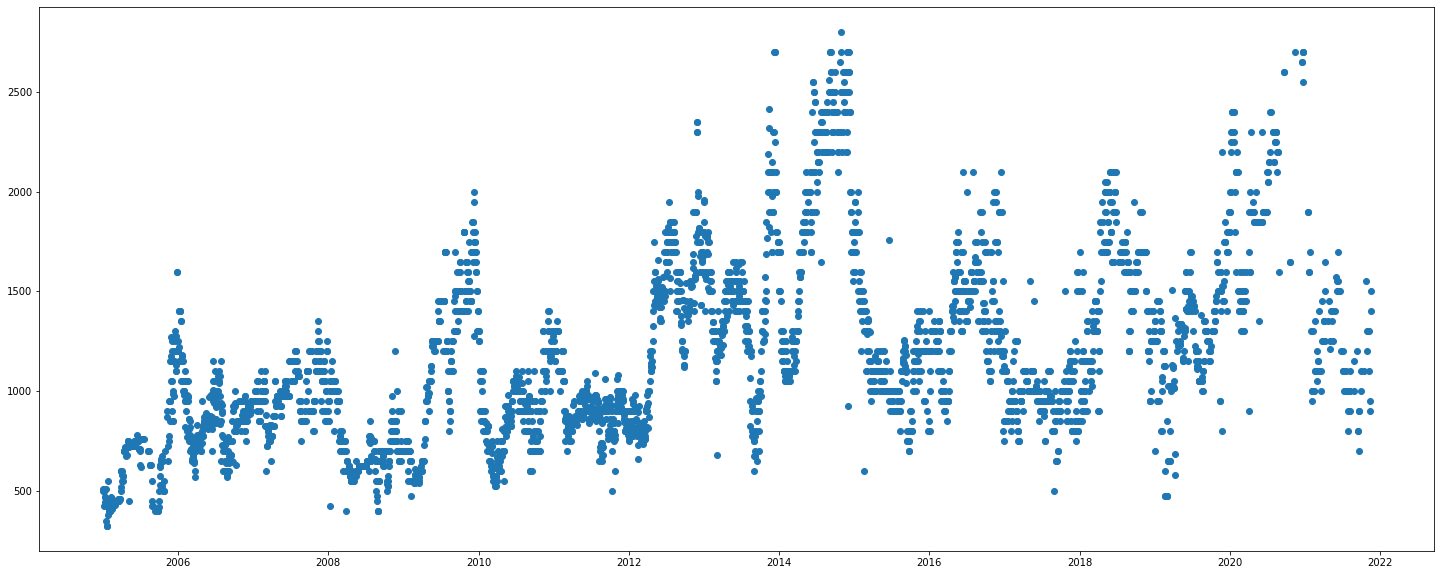

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.scatter(df1['ds'],df1['y'])
plt.show()

In [28]:
df1.isnull().sum()

ds     0
y     10
dtype: int64

In [29]:
#FBPROPHET 
#import an algorithm
#call an algorithm
#fit the model 
import fbprophet 
op = fbprophet.Prophet()
op.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
forecast = op.make_future_dataframe(periods = 24, freq = 'M')
forecast = op.predict(forecast)

<Figure size 1080x720 with 0 Axes>

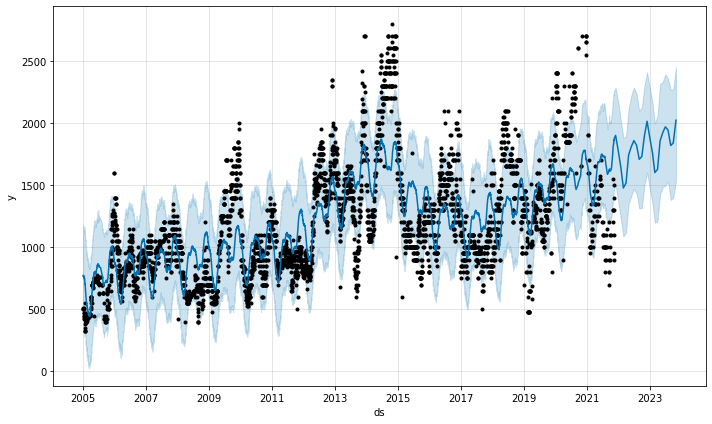

In [45]:
plt.figure(figsize=(15,10))
op.plot(forecast)
plt.show()

In [ ]:
#DARK BLUE LINE - predicted line / best fit line 
#BLACK POINTS - original data
#BLUE SHADE - min and max values upto which the prices can increase / decrease